# Linear models with both numeric and factor explanatory variables without interaction

本节需要的包：


In [2]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Using both IQ and teaching method to explain increase in language proficiency

在以下示例中，教育专家对三种不同的教学方法中哪一种最有效地提高语言成绩感兴趣——这是通过智商测量的。为了做到这一点，30名学生被随机分配到三个组中，并使用不同的教学方法进行教学。每个学生的智商在教学计划开始之前进行了测量。这种随机化是为了确保每个组中都代表了一定范围的学生能力。由于学生处于测试环境中，我们可以假设他们的测试成绩互相独立。

As usual, we begin by inspecting the data:

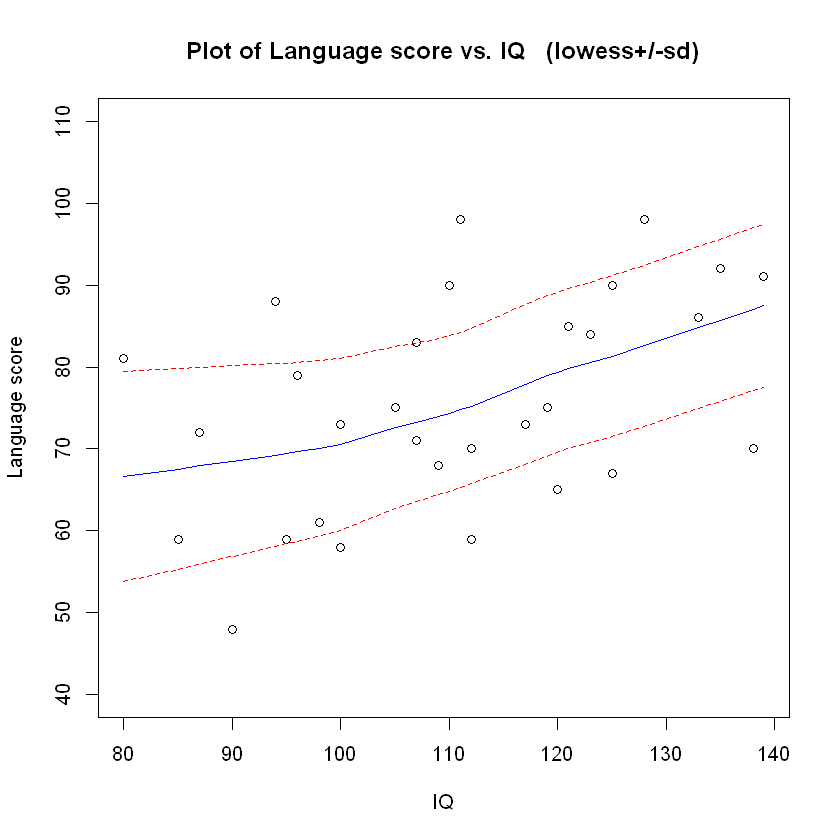

In [3]:
## Invoke the s20x library
library(s20x)
## Importing data found in the s20x library into R
data(teach.df)
## Plot the data with trendscatter()
trendscatter(lang ~ IQ,
    f = 0.8, ylim = c(40, 110),
    data = teach.df,
    ylab = "Language score"
)
## Note that f is the proportion of points in the plot which influence the
## smooth at each value. Larger values of f give more smoothness!


嗯，智商与语言成绩呈正相关，但统计显著性并不明显。一个显示教学方法的图表可能更有用。

In dataframe `teach.df` the `method` is recorded as a number, 1, 2 or 3:


In [4]:
teach.df$method
class(teach.df$method)


[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3

[1] "integer"

然而，这些只是标签，也可以是“A”、“B”或“C”。因此，需要将其强制转换为因子，以使 `method` 不被视为数值变量。

In [5]:
teach.df$method <- factor(teach.df$method)
teach.df$method
class(teach.df$method)


[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

[1] "factor"

Student language score by teaching method and IQ:

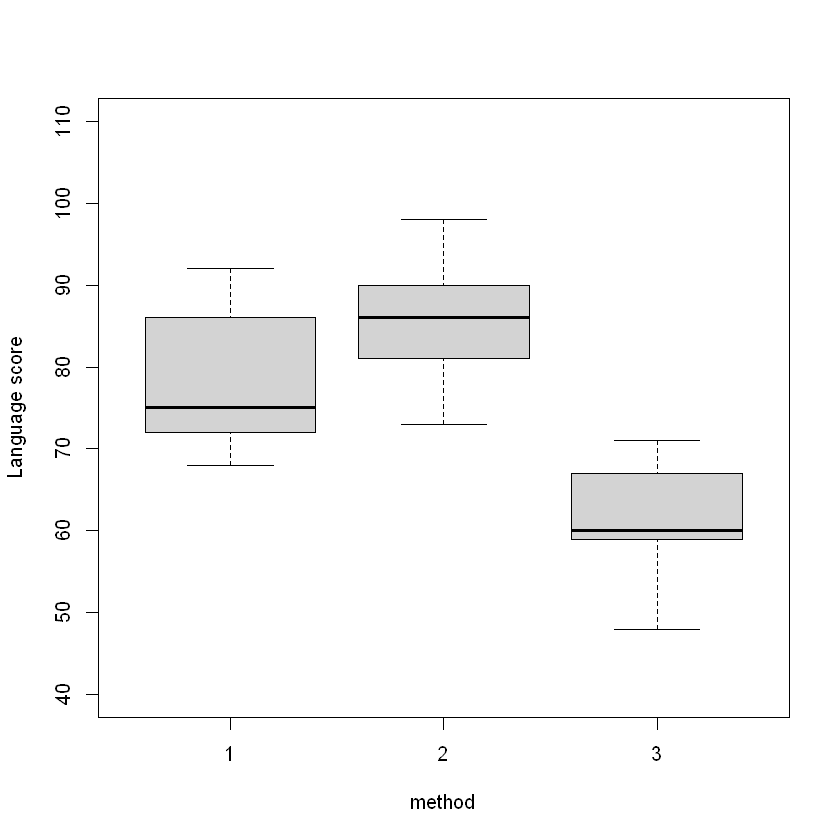

In [6]:
plot(lang ~ method, ylim = c(40, 110), data = teach.df, ylab = "Language score")


A more useful plot:

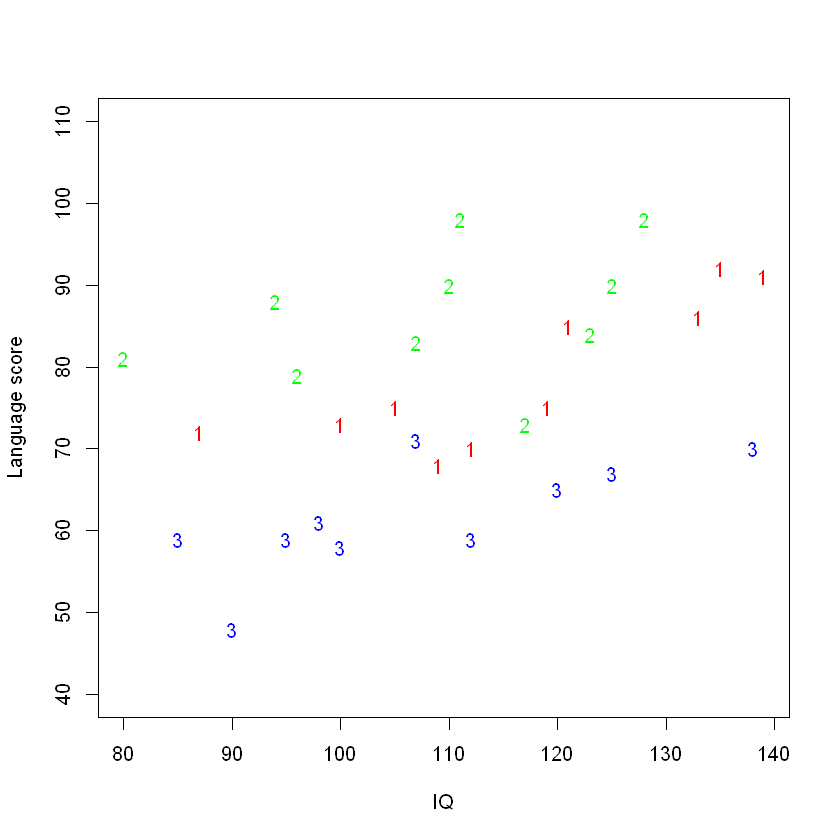

In [7]:
plot(
    lang ~ IQ,
    ylim = c(40, 110),
    pch = as.character(method),
    col = c("red", "green", "blue")[method],
    data = teach.df,
    ylab = "Language score"
)


We will fit the model with interaction first, anticipating that the interaction will not be significant.

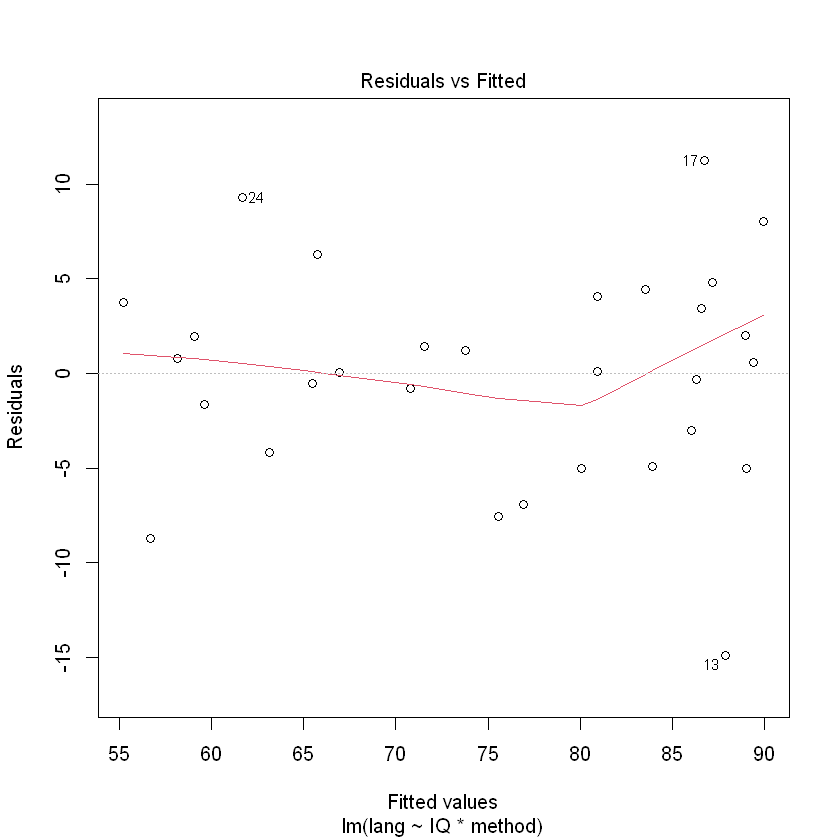

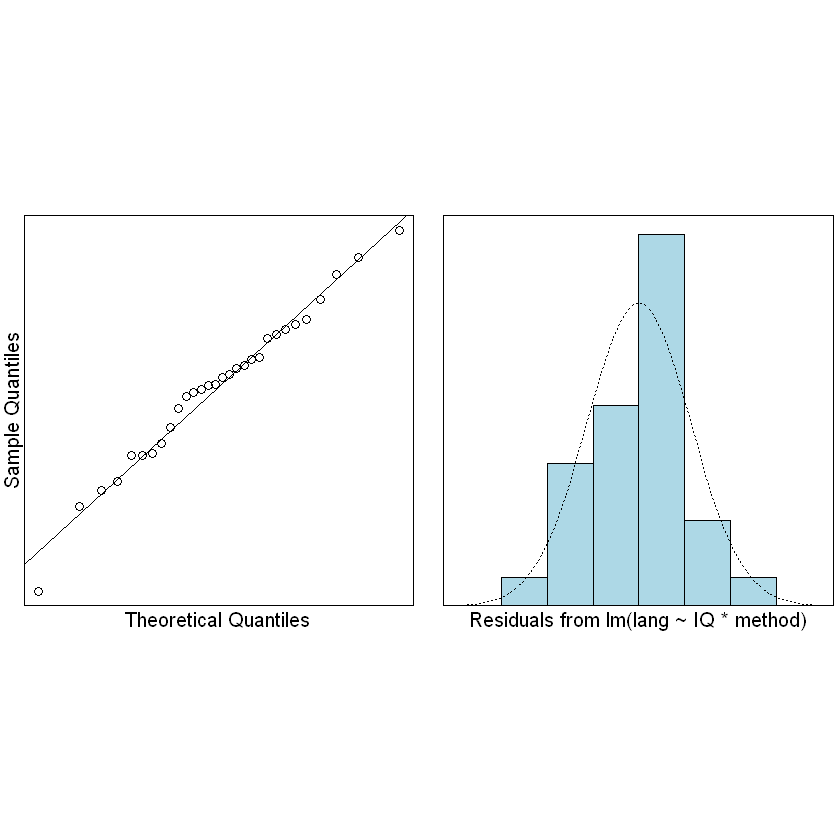

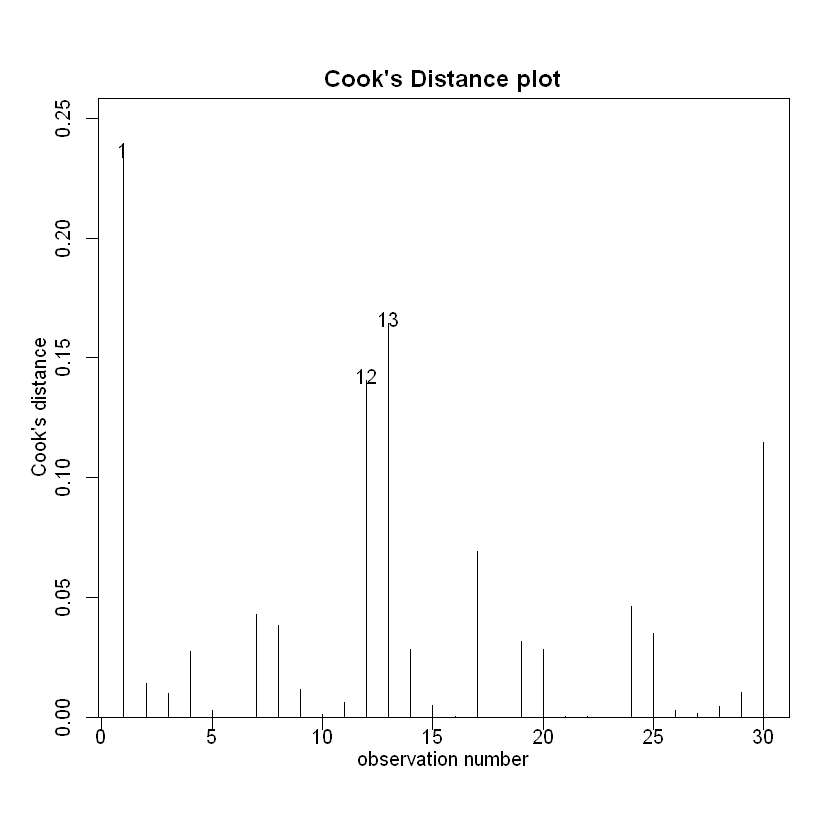

In [8]:
TeachIQmethod.fit <- lm(lang ~ IQ * method, data = teach.df)
plot(TeachIQmethod.fit, which = 1)
normcheck(TeachIQmethod.fit)
cooks20x(TeachIQmethod.fit)


It looks like we can trust the output of the fitted model.

## Model selection using Occam’s razor

Our fitted interaction model is:

In [9]:
summary(TeachIQmethod.fit)



Call:
lm(formula = lang ~ IQ * method, data = teach.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8884  -3.8732   0.3435   3.6598  11.2420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  26.8346    14.5250   1.847  0.07704 . 
IQ            0.4471     0.1241   3.604  0.00142 **
method2      39.0098    20.7473   1.880  0.07227 . 
method3       3.5617    19.7222   0.181  0.85820   
IQ:method2   -0.2587     0.1831  -1.413  0.17042   
IQ:method3   -0.1546     0.1749  -0.883  0.38574   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.199 on 24 degrees of freedom
Multiple R-squared:  0.8121,	Adjusted R-squared:  0.7729 
F-statistic: 20.74 on 5 and 24 DF,  p-value: 5.284e-08


在之前的章节中，我们已经看到，如果这样做可以简化拟合模型，我们将删除不重要的项。这是模型选择的非常重要的原则，也是 “Occam’s Razor” 原理的应用，又称为“principle of parsimony”。

该原则指出，在预测能力相等的竞争模型中，应选择参数最少的模型。

在STATS20x中，有时我们称之为 “keep it simple, statistician” 的原则。在本课程中，我们使用的一般模型选择方法是进行假设检验，以确定是否可以从当前模型中删除最复杂的项。

> 当我们在模型公式中使用了“乘上”符号时，表示我们认为它具有交互效应。
>
> 交互效应不一定会带来较好的效果。有时也需要考虑去除交互效应，以获得更好的效果。

anova 函数分析

Sum：来解释的偏差
R 方等于 1-其他偏差/总偏差

In [10]:
anova(TeachIQmethod.fit)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IQ,1,1004.41693,1004.41693,26.141645,3.123528e-05
method,2,2901.82976,1450.91488,37.762507,3.866766e-08
IQ:method,2,78.82287,39.41143,1.025749,3.737167e-01
Residuals,24,922.13044,38.42210,NA,NA


Occam’s razor 原理要求我们通过删除交互项来精简我们的模型。为此，我们只需在模型公式中用“+”替换交互项“x”。非交互模型有时被称为加法模型（因为效应“相加”）或“主效应”模型。

In [11]:
TeachIQmethod.fit2 <- lm(lang ~ IQ + method, data = teach.df)
summary(TeachIQmethod.fit2)



Call:
lm(formula = lang ~ IQ + method, data = teach.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8936  -3.1331  -0.3047   4.1294  11.0003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.08552    8.73921   4.816 5.47e-05 ***
IQ            0.31564    0.07341   4.299 0.000213 ***
method2       9.87793    2.82068   3.502 0.001688 ** 
method3     -14.15922    2.85240  -4.964 3.70e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.205 on 26 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7725 
F-statistic: 33.82 on 3 and 26 DF,  p-value: 3.986e-09


The equation for the parallel lines (i.e, no-interaction) model is:

$$
\text{1ang}=\beta_0+\beta_1\times\text{IQ}+\beta_2\times\text{D2}+\beta_3\times\text{D3}+\varepsilon
$$

where, as usual $\varepsilon\overset{iid}{\sim}N(0,\sigma^2)$.

There are two indicator variables since teaching method has three levels:

- `D2` is an indicator variable whereby: `D2 = 1` if teaching method 2 is taught – otherwise it is 0.
- `D3` is an indicator variable whereby: `D3 = 1` if teaching method 3 is taught – otherwise it is 0.
- Teaching method 1 is the reference/baseline level group.

Let us see if we really do have identical intercepts.

In [12]:
anova(TeachIQmethod.fit2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IQ,1,1004.417,1004.4169,26.08997,2.528819e-05
method,2,2901.830,1450.9149,37.68786,2.077362e-08
Residuals,26,1000.953,38.4982,NA,NA


Our preferred model is the no-interaction(没有交互的) model:

In [13]:
summary(TeachIQmethod.fit2)



Call:
lm(formula = lang ~ IQ + method, data = teach.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8936  -3.1331  -0.3047   4.1294  11.0003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.08552    8.73921   4.816 5.47e-05 ***
IQ            0.31564    0.07341   4.299 0.000213 ***
method2       9.87793    2.82068   3.502 0.001688 ** 
method3     -14.15922    2.85240  -4.964 3.70e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.205 on 26 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7725 
F-statistic: 33.82 on 3 and 26 DF,  p-value: 3.986e-09


图像：

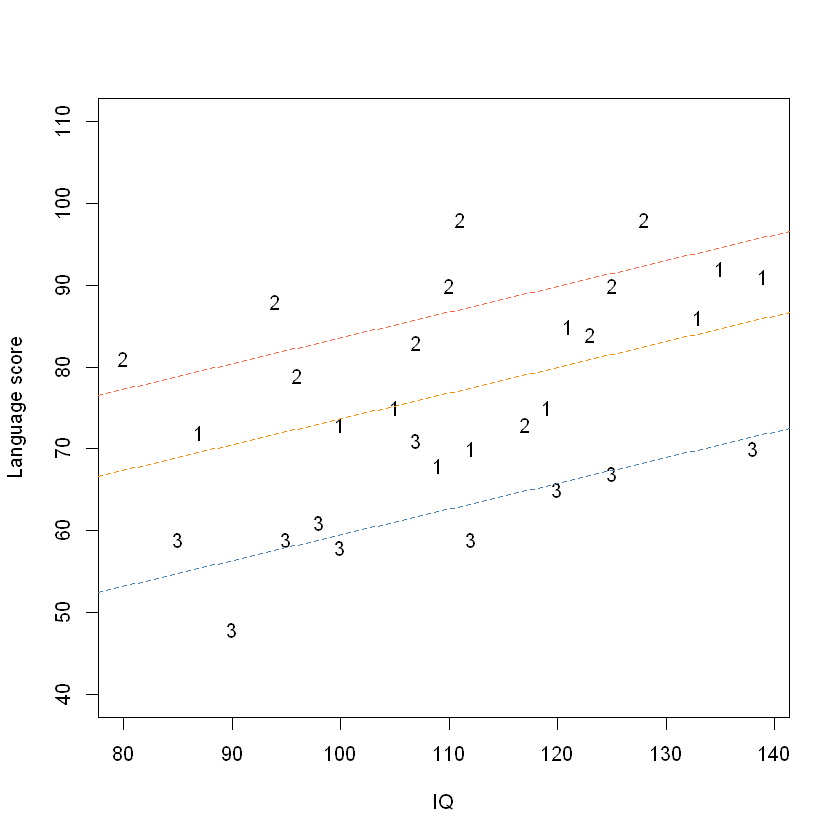

In [14]:
plot(lang ~ IQ,
    ylim = c(40, 110),
    pch = as.character(method),
    data = teach.df,
    ylab = "Language score"
)
b <- coef(TeachIQmethod.fit2)
abline(b[1], b[2], lty = 2, col = "darkorange")
abline(b[1] + b[3], b[2], lty = 2, col = "tomato")
abline(b[1] + b[4], b[2], lty = 2, col = "steelblue")


We are now able to deduce:

- $\beta_1>0$: IQ has a common positive effect on the expected language score of all students
- $\beta_2>0$: teaching method 2 is better than teaching method 1 regardless of a student's IQ.
- $\beta_3<0$: teaching method 3 is worse than teaching method 1 regardless of a student's IQ.

## Changing the reference level of teaching method

We need to change this to make method 2 (or alternatively method 3) the baseline. The fitted model will be exactly the same, but the intercept coefficients will change due to the change in reference level.

In [15]:
teach.df$method <- relevel(teach.df$method, ref = "2")
TeachIQmethod.fit3 <- lm(lang ~ IQ + method, data = teach.df)
summary(TeachIQmethod.fit3)


Call:
lm(formula = lang ~ IQ + method, data = teach.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8936  -3.1331  -0.3047   4.1294  11.0003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.96345    8.24637   6.301 1.14e-06 ***
IQ            0.31564    0.07341   4.299 0.000213 ***
method1      -9.87793    2.82068  -3.502 0.001688 ** 
method3     -24.03715    2.77910  -8.649 3.97e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.205 on 26 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7725 
F-statistic: 33.82 on 3 and 26 DF,  p-value: 3.986e-09


As the fit2:

In [16]:
summary(TeachIQmethod.fit2)


Call:
lm(formula = lang ~ IQ + method, data = teach.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8936  -3.1331  -0.3047   4.1294  11.0003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.08552    8.73921   4.816 5.47e-05 ***
IQ            0.31564    0.07341   4.299 0.000213 ***
method2       9.87793    2.82068   3.502 0.001688 ** 
method3     -14.15922    2.85240  -4.964 3.70e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.205 on 26 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7725 
F-statistic: 33.82 on 3 and 26 DF,  p-value: 3.986e-09


Let us put confidence bounds on our effects.

In [17]:
## Baseline method here is method1.
confint(TeachIQmethod.fit2)
## Baseline method here is method2.
confint(TeachIQmethod.fit3)

,2.5 %,97.5 %
(Intercept),24.1218063,60.0492251
IQ,0.1647361,0.4665482
method2,4.0799363,15.6759248
method3,-20.0224212,-8.2960209


,2.5 %,97.5 %
(Intercept),35.0127936,68.9140989
IQ,0.1647361,0.4665482
method1,-15.6759248,-4.0799363
method3,-29.7496781,-18.3246250


> 备注：有log就是中位值，其他都是讨论的均值